## 🧮 Python Lab: Matrix Decomposition
#### Singular Value Decomposition (SVD) with Python
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 3 - March 1, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week03/01_SVD_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week03/01_SVD_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1️⃣ Creating a Sample Matrix

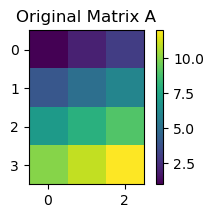

In [6]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# Visualize the original matrix as a heatmap
plt.figure(figsize=(3, 2))
plt.imshow(A, cmap='viridis')
plt.title("Original Matrix A")
plt.colorbar()
plt.show()

## 2️⃣ Performing Singular Value Decomposition
SVD decomposes $A$ (4x3) into three matrices: $U$, $\Sigma$ (Sigma), and $V^T$.

#### $A = U  \Sigma  V^T$

Where:
- $U$: left singular vectors (4x4)
- $\Sigma$: singular values (diagonal, 4x3 when padded)
- $V^T$: right singular vectors (3x3)

In [8]:
# Compute SVD
U, Sigma, Vt = np.linalg.svd(A, full_matrices=True)

> **TODO**: Convert Sigma (1D array) into a diagonal matrix of shape (4, 3) <br>
> _Hint_: Use `np.zeros` to create a matrix and fill the diagonal with Sigma values.

In [10]:
# Sigma_mat = # Your code here
# Sigma_mat[:3, :3] = # Your code here

## 3️⃣ Visualizing the Components
Let’s see what $U$, $\Sigma$, and $V^T$ look like!

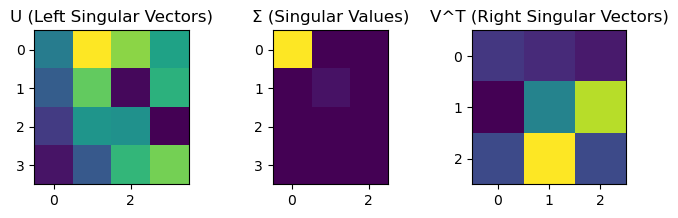

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(8, 2))
axs[0].imshow(U, cmap='viridis')
axs[0].set_title("U (Left Singular Vectors)")
axs[1].imshow(Sigma_mat, cmap='viridis')
axs[1].set_title("Σ (Singular Values)")
axs[2].imshow(Vt, cmap='viridis')
axs[2].set_title("V^T (Right Singular Vectors)")
plt.show()

## 4️⃣ Reconstructing the Matrix
Let’s rebuild $A$ using $U$, $\Sigma$, and $V^T$ to see how close we get.

> **TODO**: Reconstruct the original matrix `A` using `U`, `Sigma_mat`, and `Vt` <br>
> _Hint_: Use matrix multiplication with `np.dot` or `@` operator.

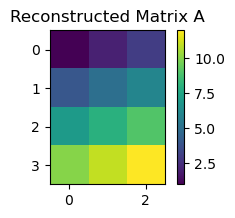

In [15]:
# A_reconstructed = # Your code here

# Visualize the reconstructed matrix
plt.figure(figsize=(3, 2))
plt.imshow(A_reconstructed, cmap='viridis')
plt.title("Reconstructed Matrix A")
plt.colorbar()
plt.show()

## 5️⃣ Computing Reconstruction Error
How good is our reconstruction? Let’s calculate the Frobenius norm of the difference.

> **TODO**: Compute the reconstruction error as the Frobenius norm of (`A - A_reconstructed`) <br>
> _Hint_: Use `np.linalg.norm` with the `'fro'` argument.

In [18]:
# error = # Your code here

print(f"Reconstruction Error (Frobenius Norm): {error:.4f}")

Reconstruction Error (Frobenius Norm): 0.0000


## 6️⃣ Low-Rank Approximation
SVD can approximate $A$ using fewer singular values. Let’s try a rank-1 approximation!

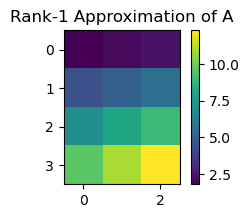

Rank-1 Approximation Error: 1.2907


In [20]:
k = 1
U_k = U[:, :k]
Sigma_k = Sigma_mat[:k, :k]  # Sigma_mat is already padded, so adjust accordingly
Vt_k = Vt[:k, :]

# Reconstruct with rank-1
A_rank1 = U_k @ Sigma_k @ Vt_k

# Visualize
plt.figure(figsize=(3, 2))
plt.imshow(A_rank1, cmap='viridis')
plt.title("Rank-1 Approximation of A")
plt.colorbar()
plt.show()

# Compute error for rank-1 approximation
error_rank1 = np.linalg.norm(A - A_rank1, 'fro')
print(f"Rank-1 Approximation Error: {error_rank1:.4f}")